Desafio da Trustly para realizar uma modelagem nos dados do dataset_test_ds.csv, não é fornecido uma contextualização
do problema ou descrição dos dados, cabendo um exercicio de interpretação.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('dataset_test_ds.csv', sep=';')

In [3]:
df

,V1,V2,V3,TARGET,V4,V5,V6,V7,V8,V9,V10,Safra
0,0,8.1,9.99,0,1968,0,0,15.15,0,0,0,201901
1,0,4.4,35.00,0,1369,0,0,63.98,1,0,0,201910
2,0,0.7,52.99,0,1228,0,0,98.84,0,0,0,201906
3,0,63.3,810.00,0,0,0,1,9237.21,0,0,0,201910
4,0,4.1,17.50,0,0,0,1,27.70,1,0,0,201902
...,...,...,...,...,...,...,...,...,...,...,...,...
11164,0,86.4,5.00,0,1964,0,0,31.57,1,0,0,201909
11165,0,6.7,55.00,0,0,0,1,114.51,0,0,0,201909
11166,0,1.2,100.00,0,1120,0,0,213.57,1,0,0,201901
11167,0,11.0,85.00,0,2005,0,0,208.33,0,0,0,201911


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11169 entries, 0 to 11168
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      11169 non-null  int64  
 1   V2      11169 non-null  float64
 2   V3      11169 non-null  float64
 3   TARGET  11169 non-null  int64  
 4   V4      11169 non-null  int64  
 5   V5      11169 non-null  int64  
 6   V6      11169 non-null  int64  
 7   V7      11169 non-null  float64
 8   V8      11169 non-null  int64  
 9   V9      11169 non-null  int64  
 10  V10     11169 non-null  int64  
 11  Safra   11169 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.0 MB


Analisando o data set, vamos que ele tem 11169 registros e 12variaveis
10 variaveis identificadas como V1, V2 ... V10, uma variavel identificada como safra
no padrão Ym e a variavel target.
Como primeiro passo será identificado os tipo/range/valores de cada variavel
As variaveis target e safra serão analisadas separadamente devido a serem as unicas identificadas

# Variável target

In [5]:
item_counts = df["TARGET"].value_counts()
print(item_counts)

0    11049
1      120
Name: TARGET, dtype: int64


Text(0.5, 0, '0:Non-Event, 1:Event')

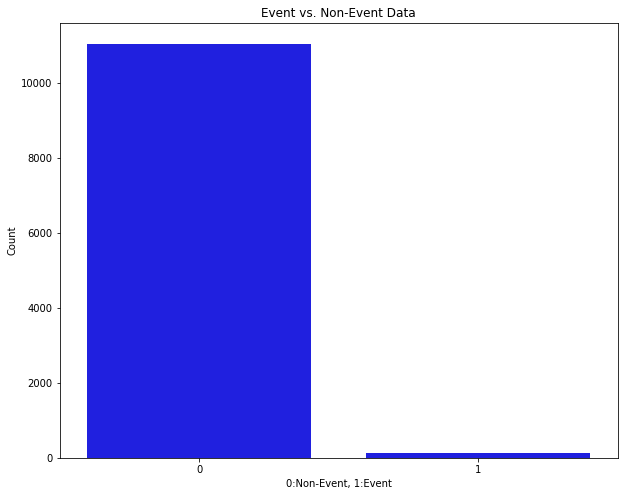

In [6]:
plt.figure(figsize=(10,8))
sns.barplot(x=df["TARGET"].value_counts().index,y=df["TARGET"].value_counts(),color='blue')
plt.title('Event vs. Non-Event Data')
plt.ylabel('Count')
plt.xlabel('0:Non-Event, 1:Event')

A variável Target, possuiu valores 0 a 1 e a variavel 1 possui 120 registros o que representa 1% do dataset,
o que da indicio que o dataset se refere a dataset de eventos raros, como por exemplo fraudes

# Variável Safra

In [7]:
item_counts = df["Safra"].value_counts()

In [8]:
df_s = pd.DataFrame(item_counts)

In [9]:
df_s = df_s.sort_index()

In [10]:
df_s.describe()

,Safra
count,12.00000
mean,930.75000
std,38.49941
min,831.00000
25%,912.50000
50%,935.50000
75%,962.00000
max,970.00000


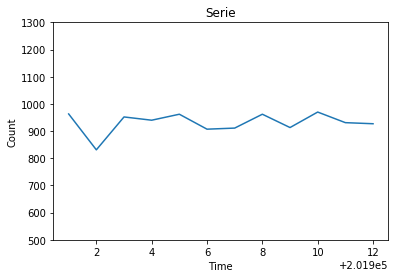

In [11]:
plt.plot(df_s)
plt.ylim(500, 1300)
plt.title('Serie')
plt.ylabel('Count')
plt.xlabel('Time');

A variável Safra, possuiu valores 2019, separados mes a mes, os dados estão bem distribuidos ao longo do tempo, notando somente uma ligeira queda em 201902

# Demais Variaves

In [12]:
df_v = df.drop(columns=['Safra', 'TARGET'])

In [13]:
print('-'*30)
print("DATASET'S DESCRIPTIVE STATISTICS: \n\n{}\n\n".format(df_v.describe(include='all')))

------------------------------
DATASET'S DESCRIPTIVE STATISTICS: 

                 V1            V2            V3            V4            V5  \
count  11169.000000  11169.000000  11169.000000  11169.000000  11169.000000   
mean       0.106366     19.726368    531.046901   1396.048438      0.189990   
std        0.308319     25.438201    906.626021   1736.590512      0.656058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      2.800000     37.520000     30.000000      0.000000   
50%        0.000000     10.000000    135.000000   1321.000000      0.000000   
75%        0.000000     25.200000    520.000000   1988.000000      0.000000   
max        1.000000    100.000000   8540.000000  15616.000000     11.000000   

                 V6             V7            V8            V9           V10  
count  11169.000000   11169.000000  11169.000000  11169.000000  11169.000000  
mean       0.177903    4346.085975      0.397529      0.008506 

Não existe presença de valores nulos

Tipos das variaveis  
V1 - boolean 0, 1  
V2 - numerica (percentual?, valores entre 0-100)  
V3 - numerica  
v4 - inteira  
v5 - inteira  
V6 - boolean 0, 1   
v7 - numerica   
V8 - boolean 0, 1   
V9 - boolean 0, 1   
V10 - boolean 0, 1   


A variação das variaveis numericas entre o 3 quartil e o 4 quartil é significativa o que pode indicar a presença de outlier

Text(0.5, 1.0, 'Boxplot V2')

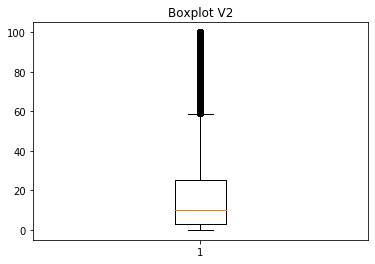

In [14]:
plt.boxplot(x=df_v['V2'])
plt.title('Boxplot V2')


Text(0.5, 1.0, 'Boxplot V3')

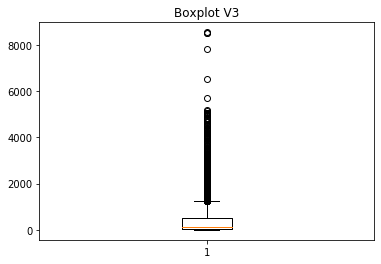

In [15]:
plt.boxplot(x=df_v['V3'])
plt.title('Boxplot V3')

Text(0.5, 1.0, 'Boxplot V4')

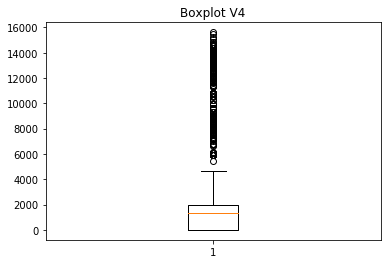

In [16]:
plt.boxplot(x=df_v['V4'])
plt.title('Boxplot V4')

Text(0.5, 1.0, 'Boxplot V5')

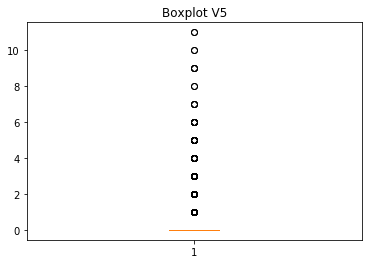

In [17]:
plt.boxplot(x=df_v['V5'])
plt.title('Boxplot V5')

Text(0.5, 1.0, 'Boxplot V7')

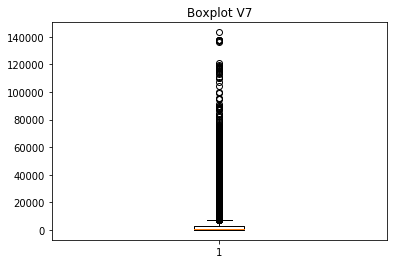

In [18]:
plt.boxplot(x=df_v['V7'])
plt.title('Boxplot V7')

# Z Score

In [19]:
df_o = df[["V2","V3","V4","V5","V7"]]

In [20]:
z = np.abs(stats.zscore(df_o))

In [21]:
df_z = pd.DataFrame(np.where(z > 3))

In [22]:
df_z_t = df_z.transpose()

Apos aplicação do Z Score, com o objetivo foi identificado a seguinte quantidade de outliers

In [23]:
a = df_z_t.loc[(df_z_t[1] == 0)].count()
print('Amount of outlier in V2:',a[0])
a = df_z_t.loc[(df_z_t[1] == 1)].count()
print('Amount of outlier in V3:',a[0])
a = df_z_t.loc[(df_z_t[1] == 2)].count()
print('Amount of outlier in V4:',a[0])
a = df_z_t.loc[(df_z_t[1] == 3)].count()
print('Amount of outlier in V5:',a[0])
a = df_z_t.loc[(df_z_t[1] == 4)].count()
print('Amount of outlier in V7:',a[0])

Amount of outlier in V2: 312
Amount of outlier in V3: 196
Amount of outlier in V4: 233
Amount of outlier in V5: 173
Amount of outlier in V7: 256


Tanto visualmente qunato pelo teste do Zscore foi identificado outliers, porém devido ao fato do dataset se basear em
detecção de evento raros os outliers podem ser uma pista para sua detecção 
Os outliers serão mantidos no dataset original até maior analise de como usa presença afeta os modelos.

# Correlação entre variaveis

In [24]:
df_v.corr().style.format("{:.2}").background_gradient()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
V1,1.0,-0.13,0.11,0.012,0.073,0.052,-0.023,-0.14,0.028,0.0063
V2,-0.13,1.0,0.29,0.043,0.013,0.015,0.49,-0.12,0.011,0.051
V3,0.11,0.29,1.0,0.11,0.071,-0.033,0.81,-0.26,0.023,0.068
V4,0.012,0.043,0.11,1.0,0.011,-0.37,0.075,-0.049,0.021,0.08
V5,0.073,0.013,0.071,0.011,1.0,0.042,0.025,-0.19,0.034,0.073
V6,0.052,0.015,-0.033,-0.37,0.042,1.0,-0.018,0.019,-0.0023,-0.013
V7,-0.023,0.49,0.81,0.075,0.025,-0.018,1.0,-0.18,0.022,0.08
V8,-0.14,-0.12,-0.26,-0.049,-0.19,0.019,-0.18,1.0,-0.039,-0.039
V9,0.028,0.011,0.023,0.021,0.034,-0.0023,0.022,-0.039,1.0,0.018
V10,0.0063,0.051,0.068,0.08,0.073,-0.013,0.08,-0.039,0.018,1.0


Atraves da analise de correlação de person não vemos correlação muito forte entre 2 variaveis. inclusive pode-se dizer que
as variaveis tem em geral correlação Fraca ou desprezivel, com execção das variaveis V3 e V7 tem uma correlação forte,

Dados levando em conta os seguintes padrões

0.9 para mais ou para menos indica uma correlação muito forte.
0.7 a 0.9 positivo ou negativo indica uma correlação forte.
0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
0 a 0.3 positivo ou negativo indica uma correlação desprezível.

# Variação dos eventos targets com o tempo

In [25]:
df_s_target = df[['Safra', 'TARGET']]

In [26]:
df_s_target = df_s_target.groupby(['Safra']).sum()

In [27]:
df_s_target

,TARGET
Safra,
201901,11
201902,12
201903,8
201904,9
201905,12
201906,9
201907,10
201908,11
201909,7


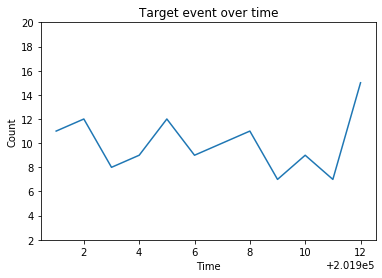

In [28]:
plt.plot(df_s_target)
plt.ylim(2, 20)
plt.title('Target event over time')
plt.ylabel('Count')
plt.xlabel('Time');

Apesar do mes com mais eventos ser dezembro, ter o dobro dos meses com menos variações setembro e novembro. Não é possivel afirmar se isso se trata de um fenonimo de sazionalidade, uma vez que só há um ano em analise. nesse caso a sazionalidade não será considerada na analise pois pode enviezar o trabalho.


# Relação das demais variaveis com a variavel target

Os testes a seguir tem como objetivo verificar que não existe uma ligação forte da variavel target com outra variavel 
e visualiar a relação dos outliers com a variavel target.

In [29]:
df_v_target = df.drop(columns=['Safra'])

In [30]:
col_name="TARGET"
first_col = df_v_target.pop(col_name)
df_v_target.insert(0, col_name, first_col)

In [31]:
df_v_target

,TARGET,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0,0,8.1,9.99,1968,0,0,15.15,0,0,0
1,0,0,4.4,35.00,1369,0,0,63.98,1,0,0
2,0,0,0.7,52.99,1228,0,0,98.84,0,0,0
3,0,0,63.3,810.00,0,0,1,9237.21,0,0,0
4,0,0,4.1,17.50,0,0,1,27.70,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11164,0,0,86.4,5.00,1964,0,0,31.57,1,0,0
11165,0,0,6.7,55.00,0,0,1,114.51,0,0,0
11166,0,0,1.2,100.00,1120,0,0,213.57,1,0,0
11167,0,0,11.0,85.00,2005,0,0,208.33,0,0,0


In [32]:
df_v_target.corr().style.format("{:.2}").background_gradient()

,TARGET,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
TARGET,1.0,0.04,0.06,0.058,-0.01,0.28,0.063,0.043,-0.056,0.057,0.052
V1,0.04,1.0,-0.13,0.11,0.012,0.073,0.052,-0.023,-0.14,0.028,0.0063
V2,0.06,-0.13,1.0,0.29,0.043,0.013,0.015,0.49,-0.12,0.011,0.051
V3,0.058,0.11,0.29,1.0,0.11,0.071,-0.033,0.81,-0.26,0.023,0.068
V4,-0.01,0.012,0.043,0.11,1.0,0.011,-0.37,0.075,-0.049,0.021,0.08
V5,0.28,0.073,0.013,0.071,0.011,1.0,0.042,0.025,-0.19,0.034,0.073
V6,0.063,0.052,0.015,-0.033,-0.37,0.042,1.0,-0.018,0.019,-0.0023,-0.013
V7,0.043,-0.023,0.49,0.81,0.075,0.025,-0.018,1.0,-0.18,0.022,0.08
V8,-0.056,-0.14,-0.12,-0.26,-0.049,-0.19,0.019,-0.18,1.0,-0.039,-0.039
V9,0.057,0.028,0.011,0.023,0.021,0.034,-0.0023,0.022,-0.039,1.0,0.018


Como esperado não há nenhuma variavel com correlação com a variavel target.

In [33]:
df_v_target = df_v_target.loc[(df_v_target["TARGET"] == 1)]

In [34]:
df_v_target = df_v_target.drop(columns=['TARGET'])

In [35]:
df_v_target

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
102,1,10.0,3005.00,2085,0,0,14760.19,0,0,0
103,0,100.0,1520.00,0,2,1,32898.97,0,0,0
115,0,91.5,90.00,2226,2,0,1068.19,0,0,0
400,0,100.0,952.99,0,0,1,18787.80,0,0,0
505,0,8.8,2998.00,2193,9,0,14408.74,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10890,0,12.6,13.92,0,1,1,24.45,0,0,0
11002,1,10.0,1264.99,0,2,1,5226.17,0,0,0
11100,0,100.0,155.00,563,1,0,2125.04,0,0,0
11135,0,0.4,244.11,1958,3,0,614.92,0,0,0


In [36]:
print('-'*30)
print("DATASET'S DESCRIPTIVE STATISTICS WHEN TARGET = 1: \n\n{}\n\n".format(df_v_target.describe(include='all')))

------------------------------
DATASET'S DESCRIPTIVE STATISTICS WHEN TARGET = 1: 

               V1          V2           V3            V4          V5  \
count  120.000000  120.000000   120.000000    120.000000  120.000000   
mean     0.225000   34.290833  1032.153167   1223.258333    1.933333   
std      0.419333   36.252643  1269.059984   1917.909469    2.643315   
min      0.000000    0.000000     6.250000      0.000000    0.000000   
25%      0.000000    8.950000   181.247500      0.000000    0.000000   
50%      0.000000   10.000000   505.000000   1069.500000    1.000000   
75%      0.000000   66.850000  1038.937500   1929.500000    3.000000   
max      1.000000  100.000000  5007.000000  12967.000000   11.000000   

               V6             V7          V8          V9         V10  
count  120.000000     120.000000  120.000000  120.000000  120.000000  
mean     0.408333    9065.989167    0.133333    0.058333    0.116667  
std      0.493586   16550.588803    0.341360    0.23535

Text(0.5, 1.0, 'Boxplot V2')

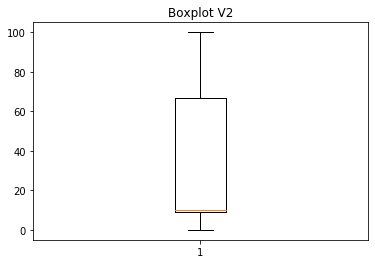

In [37]:
plt.boxplot(x=df_v_target['V2'])
plt.title('Boxplot V2')

Text(0.5, 1.0, 'Boxplot V3')

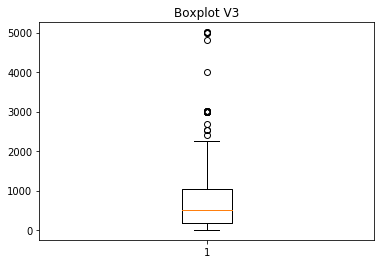

In [38]:
plt.boxplot(x=df_v_target['V3'])
plt.title('Boxplot V3')

Text(0.5, 1.0, 'Boxplot V4')

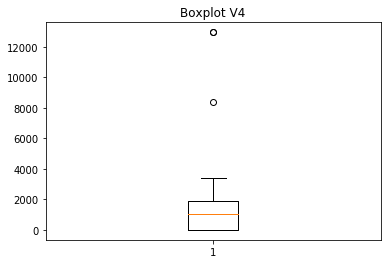

In [39]:
plt.boxplot(x=df_v_target['V4'])
plt.title('Boxplot V4')

Text(0.5, 1.0, 'Boxplot V5')

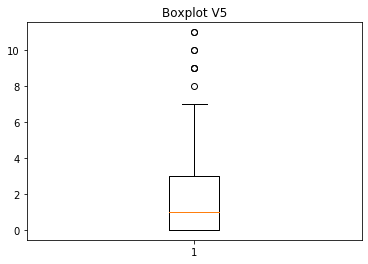

In [40]:
plt.boxplot(x=df_v_target['V5'])
plt.title('Boxplot V5')

Text(0.5, 1.0, 'Boxplot V7')

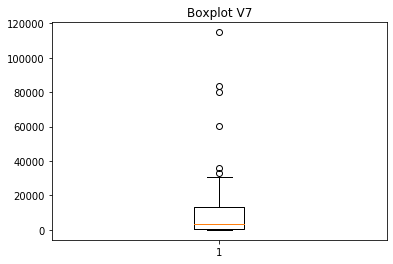

In [41]:
plt.boxplot(x=df_v_target['V7'])
plt.title('Boxplot V7')

In [42]:
df_v_target_o = df_v_target[["V2","V3","V4","V5","V7"]]

In [43]:
z = np.abs(stats.zscore(df_v_target_o))

In [44]:
df_v_target_z = pd.DataFrame(np.where(z > 3))

In [45]:
df_v_target_z_t = df_v_target_z.transpose()

In [46]:
a = df_v_target_z_t.loc[(df_v_target_z_t[1] == 0)].count()
print('Amount of outlier in V2:',a[0])
a = df_v_target_z_t.loc[(df_v_target_z_t[1] == 1)].count()
print('Amount of outlier in V3:',a[0])
a = df_v_target_z_t.loc[(df_v_target_z_t[1] == 2)].count()
print('Amount of outlier in V4:',a[0])
a = df_v_target_z_t.loc[(df_v_target_z_t[1] == 3)].count()
print('Amount of outlier in V5:',a[0])
a = df_v_target_z_t.loc[(df_v_target_z_t[1] == 4)].count()
print('Amount of outlier in V7:',a[0])

Amount of outlier in V2: 0
Amount of outlier in V3: 4
Amount of outlier in V4: 3
Amount of outlier in V5: 4
Amount of outlier in V7: 4


Como esperado analisando as variaveis quando analisado o data set somente dos valores possitivos identificamos que as variaveis tiveram variação na media, e na distribuição.

Foi identificado redução significativa do numero de outlier, o que indica que a relação outlier com target não é  destacada

porem se optar por manter as linhas com outlier uma vez que elas represetam 12,5% do dataset das variaveis targets. Numero  
expressivo de target para ser descartado.

# Modelagem

Devido a falta de contextualização do problema não será aplicado tecnicas combinação de variaveis pois existe a possibilidade
de combinação e ma interpretação de variaveis



Por falta de decisão de negocio de qual deve ser a metrica de sucesso será utilizado a metrica de F1 score com a formula 
2TP / (2TP + FP + FN) 

onde:
TP = True positive
TN = True negative
FP = False positive
FN = False negative

outras metricas serão geradas para efeito de comparação

 Precision = TP / (TP + FP)  
 Recall = TP / (TP + FN)  
 Accuracy = (TP + TN) / (TP + TN + FP + FN)  


Tecnicas a serem usadas
Logistic Regression
Neural Networks
Random florest

# Logistica regression

O data set será separando em 3 grupos treino, validação e teste.
Time for Train-Test-Split
60% Training
20% Validation
20% Test

Como forma de balanceamento seráStandardScaler - Undersampling

Notes on using StandardScaler
StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in normal distribution. It is more useful in classification than regression. You can read this blog of mine.

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

Normalizer : It squeezes the data between 0 and 1. It performs normalization. Due to the decreased range and magnitude, the gradients in the training process do not explode and you do not get higher values of loss. Is more useful in regression than classification. You can read this blog of mine.

Another issue to address is the highly imbalanced dataset. With so many non-fraudulent transactions in place, I implemented Random Undersampling to decrease the number of non-fraudulent transactions and match it to the amount of fraudulent transactions.
With this set up, I’m now ready to run the data through some models!

StandardScaler - Undersampling

Recall (True Positive Rate): % of all fraudulent transactions cases captured
Precision: Out of all items labeled as fraud, what percentage of them is actually fraud?
False Positive Rate:

Accuracy: How correct the model is (misleading for fraud/imbalanced data)

F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.

In [47]:
df_target = df['TARGET']

In [48]:
X_break, X_test, y_break, y_test = train_test_split(df_v, df_target, \
                                                    test_size=0.2, stratify=df['TARGET'],
                                                    random_state=42)

#random_state generates a set kind of deck for each random state. 42 will always be the same kind of split
X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, \
                                                    test_size=0.25, stratify=y_break,
                                                    random_state=42)
# Initialize fit StandardScaler
std_scale = StandardScaler().fit(X_train)

# Scale data
X_train_std = std_scale.transform(X_train)
X_val_std = std_scale.transform(X_val)
X_test_std = std_scale.transform(X_test)

In [49]:
X_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_sample(X_train_std,y_train)
X_val_under, y_val_under = RandomUnderSampler(random_state=42).fit_sample(X_val_std,y_val)

In [50]:
penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)
logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)

In [51]:
logistic_grid = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', verbose=10, n_jobs=-1)

In [52]:
%%capture
logistic_grid.fit(X_train_under, y_train_under)

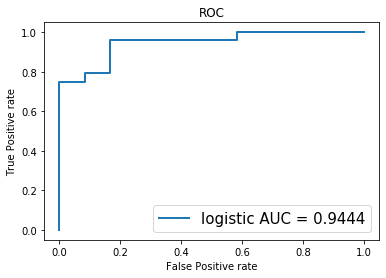

In [53]:
y_pred = list(logistic_grid.predict_proba(X_val_under)[:,1])
fpr, tpr, threshold = metrics.roc_curve(y_val_under, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = ('logistic AUC = %0.4f' % roc_auc),linewidth=2.0)
leg = plt.legend(loc = 'lower right',prop={'size': 15})
plt.title('ROC')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate');
plt.show()

In [54]:
def find_best_threshold(model, int_num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, int_num_steps):
        y_predict = (model.predict_proba(X_val_under)[:, 1] >= threshold) 
        f1 = f1_score(y_val_under,y_predict)
        acc = accuracy_score(y_val_under,y_predict)
        rec = recall_score(y_val_under,y_predict)
        pre = precision_score(y_val_under,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = threshold, f1, acc, rec, pre
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [55]:
chart = list()

In [56]:
%%capture
best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(logistic_grid,50)
chart.append(["logistic", best_thresh, high_f1, high_acc, high_rec, high_pre])

In [57]:
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshhold','F1 Score','Accuracy','Recall','Precision'])

In [58]:
chart

,Model,Best Threshhold,F1 Score,Accuracy,Recall,Precision
0,logistic,0.367347,0.884615,0.875,0.958333,0.821429


In [59]:
val_y_predict = (logistic_grid.predict_proba(X_val_under)[:, 1] >= chart['Best Threshhold'][0])
fraud_confusion = confusion_matrix(y_val_under, val_y_predict)

Text(0.5, 1, 'Confusion Matrix- Validation')

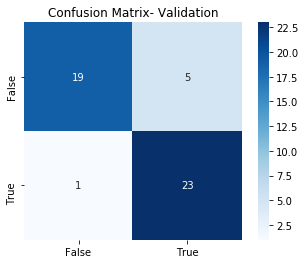

In [60]:
sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['False', 'True'],
           yticklabels=['False', 'True'])
plt.title('Confusion Matrix- Validation')


In [61]:
result_y_predict = (logistic_grid.predict_proba(X_test_std)[:, 1] >= chart['Best Threshhold'][0])
fraud_confusion = confusion_matrix(y_test, result_y_predict)

Text(0.5, 1, 'Confusion Matrix- Test')

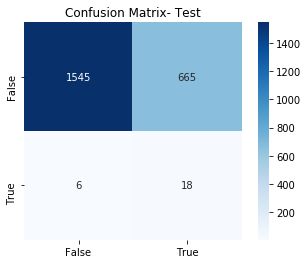

In [62]:
sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['False', 'True'],
           yticklabels=['False', 'True'])
plt.title('Confusion Matrix- Test')

In [63]:
result_chart = []

In [64]:
f1 = f1_score(y_test,result_y_predict)
acc = accuracy_score(y_test,result_y_predict)
rec = recall_score(y_test,result_y_predict)
pre = precision_score(y_test,result_y_predict)

In [65]:
result_chart.append(["logistic regression", f1, acc, rec, pre])

# Neural network

In [66]:
model_NN = keras.Sequential([
layers.Dense(input_dim = 10, units = 16, activation = 'relu'),
layers.Dense(units = 24, activation = 'relu'),
layers.Dropout(0.5),
layers.Dense(units = 20, activation = 'relu'),
layers.Dense(units = 24, activation = 'relu'),
layers.Dense(units =1, activation = 'sigmoid'),])

In [67]:
model_NN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_NN.fit(X_train_under, y_train_under, batch_size = 15, epochs = 5)

Epoch 1/5
10/10 [==============================] - 0s 4ms/step - loss: 0.7317 - accuracy: 0.5347
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.7187 - accuracy: 0.4861
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.5694
Epoch 4/5
10/10 [==============================] - 0s 7ms/step - loss: 0.6700 - accuracy: 0.6528
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.6597


In [68]:
score = model_NN.evaluate(X_test_std,y_test)

70/70 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.6858


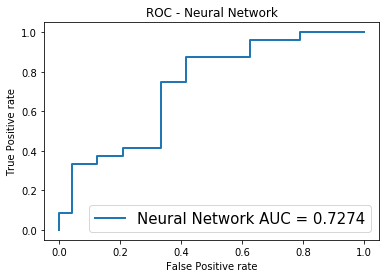

In [69]:
y_pred = list(model_NN.predict(X_val_under))
fpr, tpr, threshold = metrics.roc_curve(y_val_under, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = ('Neural Network AUC = %0.4f' % roc_auc),linewidth=2.0)
leg = plt.legend(loc = 'lower right',prop={'size': 15})
plt.title('ROC - Neural Network')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate');
plt.show()

In [70]:
def find_best_threshold_2(model, int_num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, int_num_steps):
        y_predict = (model.predict(X_val_under) >= threshold) 
        f1 = f1_score(y_val_under,y_predict)
        acc = accuracy_score(y_val_under,y_predict)
        rec = recall_score(y_val_under,y_predict)
        pre = precision_score(y_val_under,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = \
                threshold, f1, acc, rec, pre
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [71]:
models = [model_NN]
model_names = ["NN"]
chart_1 =[]
for item,name in zip(models,model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold_2(item,20)
    chart_1.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

/projeto/libs/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
chart_1 = pd.DataFrame(chart_1, columns=['Model', 'Best Threshhold','F1 Score','Accuracy','Recall','Precision'])

In [73]:
chart = chart.append(chart_1)

In [74]:
val_y_predict = (model_NN.predict(X_val_under) >= chart_1['Best Threshhold'][0])
fraud_confusion = confusion_matrix(y_val_under, val_y_predict)

Text(0.5, 1, 'Confusion Matrix- Validation')

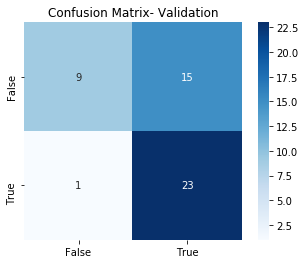

In [75]:
sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['False', 'True'],
           yticklabels=['False', 'True'])
plt.title('Confusion Matrix- Validation')

In [76]:
result_y_predict = (model_NN.predict(X_test_std) >= chart_1['Best Threshhold'][0])
fraud_confusion = confusion_matrix(y_test, result_y_predict)

Text(0.5, 1, 'Confusion Matrix- Test')

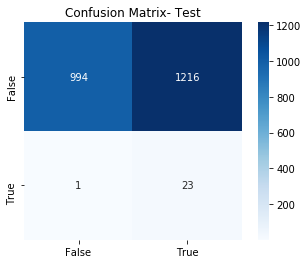

In [77]:
sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['False', 'True'],
           yticklabels=['False', 'True'])
plt.title('Confusion Matrix- Test')

In [78]:
f1 = f1_score(y_test,result_y_predict)
acc = accuracy_score(y_test,result_y_predict)
rec = recall_score(y_test,result_y_predict)
pre = precision_score(y_test,result_y_predict)

In [79]:
result_chart.append(["MM", f1, acc, rec, pre])

# RF

In [80]:
%%capture
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [500, 700]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train_under,y_train_under)

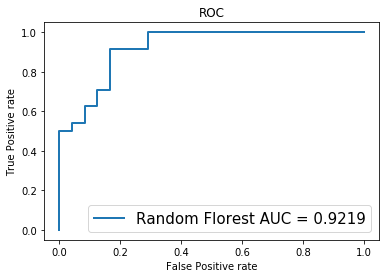

In [81]:
y_pred = list(rf_grid.predict_proba(X_val_under)[:,1])
fpr, tpr, threshold = metrics.roc_curve(y_val_under, y_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = ('Random Florest AUC = %0.4f' % roc_auc),linewidth=2.0)
leg = plt.legend(loc = 'lower right',prop={'size': 15})
plt.title('ROC')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate');
plt.show()

In [82]:
%%capture
models = [rf_grid]
model_names = ["RF"]
chart_2 =[]
for item,name in zip(models,model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item,20)
    chart_2.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

In [83]:
chart_2 = pd.DataFrame(chart_2, columns=['Model', 'Best Threshhold','F1 Score','Accuracy','Recall','Precision'])

In [84]:
chart = chart.append(chart_2)

In [85]:
chart

,Model,Best Threshhold,F1 Score,Accuracy,Recall,Precision
0,logistic,0.367347,0.884615,0.875000,0.958333,0.821429
0,NN,0.473684,0.741935,0.666667,0.958333,0.605263
0,RF,0.368421,0.872727,0.854167,1.000000,0.774194


In [86]:
val_y_predict = (rf_grid.predict(X_val_under) >= chart_2['Best Threshhold'][0])
fraud_confusion = confusion_matrix(y_val_under, val_y_predict)

Text(0.5, 1, 'Confusion Matrix- Validation')

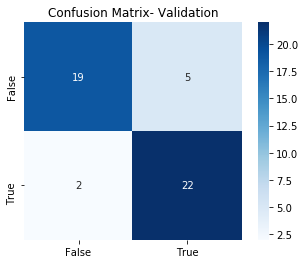

In [87]:
sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['False', 'True'],
           yticklabels=['False', 'True'])
plt.title('Confusion Matrix- Validation')

In [88]:
result_y_predict = (rf_grid.predict(X_test_std) >= chart_2['Best Threshhold'][0])
fraud_confusion = confusion_matrix(y_test, result_y_predict)

Text(0.5, 1, 'Confusion Matrix- Test')

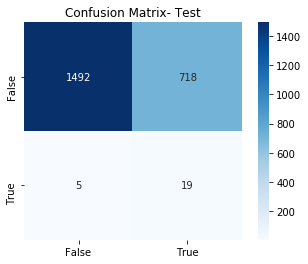

In [89]:
sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['False', 'True'],
           yticklabels=['False', 'True'])
plt.title('Confusion Matrix- Test')

In [90]:
f1 = f1_score(y_test,result_y_predict)
acc = accuracy_score(y_test,result_y_predict)
rec = recall_score(y_test,result_y_predict)
pre = precision_score(y_test,result_y_predict)

In [91]:
result_chart.append(["RF", f1, acc, rec, pre])

In [92]:
chart

,Model,Best Threshhold,F1 Score,Accuracy,Recall,Precision
0,logistic,0.367347,0.884615,0.875000,0.958333,0.821429
0,NN,0.473684,0.741935,0.666667,0.958333,0.605263
0,RF,0.368421,0.872727,0.854167,1.000000,0.774194


In [93]:
result_chart = pd.DataFrame(result_chart, columns=['Model', 'F1 Score','Accuracy','Recall','Precision'])

In [94]:
result_chart

,Model,F1 Score,Accuracy,Recall,Precision
0,logistic regression,0.050919,0.699642,0.750000,0.026354
1,MM,0.036421,0.455237,0.958333,0.018563
2,RF,0.049934,0.676365,0.791667,0.025780
